<h1 style="text-align: center;">
    The Analyst Challenge<br><br>
    Advertising Campaign Performance Dataset<br>
</h1>  


## 1. Giới thiệu về challenge

### Bối Cảnh
Việc phân tích hiệu quả quảng cáo (***ad performance***) và tối ưu ngân sách marketing là yếu tố then chốt giúp doanh nghiệp tăng trưởng bền vững.  
Dựa trên bộ dữ liệu thực tế từ nhiều chiến dịch quảng cáo đa kênh, đa mục tiêu, đa phân khúc khách hàng và nhiều địa phương/ngôn ngữ khác nhau, bạn sẽ khám phá các yếu tố tạo nên ROI cao, nhắm đúng đối tượng và cải thiện conversion rate.  

Trong thử thách này, bạn sẽ sử dụng Power BI để phân tích dữ liệu campaign từ nhiều lĩnh vực, nhiều vùng địa lý, và tìm ra chiến lược/cách tiếp cận hiệu quả nhất.

### Yêu Cầu
Bạn cần sử dụng `Power BI` để:

- Phân tích hiệu quả các campaign trên nhiều channel/platform khác nhau (ví dụ: Twitter, Instagram…)
- So sánh hiệu quả theo target audience, location, language, campaign goal và customer segment.
- Xác định các yếu tố mang lại ROI, conversion rate cao, cũng như hiệu quả chi phí (cost efficiency).
- Trực quan hóa các chỉ số: impressions, clicks, spend, conversion rate, ROI.
- Xây dựng dashboard tương tác dành cho các decision-maker trong doanh nghiệp để theo dõi hiệu quả campaign.
- Đưa ra đề xuất cụ thể, dựa trên dữ liệu để tối ưu các chiến dịch quảng cáo tiếp theo.

### Mô Tả Dữ Liệu

#### Tổng Quan
- Bộ dữ liệu cung cấp thông tin chi tiết về hoạt động của các chiến dịch quảng cáo đa kênh, đa mục tiêu. Nó được thiết kế để giúp doanh nghiệp phân tích hiệu quả ngân sách, hiệu suất chuyển đổi, ROI và hành vi khách hàng theo từng khu vực và phân khúc thị trường.
- Bộ dữ liệu này lý tưởng để khám phá chiến lược marketing hiệu quả nhất, xác định yếu tố nào mang lại kết quả tốt, từ đó tối ưu ngân sách và nâng cao tỷ lệ chuyển đổi.

#### Cấu Trúc Dữ Liệu
Bộ dữ liệu bao gồm nhiều cột, mỗi cột đại diện cho một khía cạnh quan trọng của hiệu quả chiến dịch quảng cáo:

| **Cột**             | **Mô tả**                                         |
|:--------------------|---------------------------------------------------|
| Campaign_ID        | Mã chiến dịch                                     |
| Target_Audience    | Đối tượng mục tiêu (ví dụ: Women 25-34, Men 25-34...) |
| Campaign_Goal      | Mục tiêu campaign (Brand Awareness, Increase Sales, Market Expansion, ...) |
| Duration           | Thời lượng chiến dịch (30 Days, 60 Days, ...)     |
| Channel_Used       | Kênh/platform chạy quảng cáo (Twitter, Instagram, ...) |
| Conversion_Rate    | Tỷ lệ chuyển đổi (%)                              |
| Spend              | Ngân sách chi tiêu (USD)                          |
| ROI                | Return on Investment                              |
| Location           | Địa điểm (city/region)                            |
| Language           | Ngôn ngữ campaign                                 |
| Clicks             | Số lượt click                                     |
| Impressions        | Số lượt hiển thị                                  |
| Customer_Segment   | Nhóm khách hàng (ví dụ: Fashion, Food, ...)       |
| Date               | Ngày chạy campaign                                |
| Company            | Tên công ty                                       |


## 2. Tiền xử lý dữ liệu

### Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', None)
import warnings
import matplotlib.ticker as mtick
warnings.filterwarnings('ignore')

In [2]:
filepath = "../dataset/ads_campaign_dataset.csv"
data = pd.read_csv(filepath)
data.head()

,Campaign_ID,Target_Audience,Campaign_Goal,Duration,Channel_Used,Conversion_Rate,Spend,ROI,Location,Language,Clicks,Impressions,Customer_Segment,Date,Company
0,578191,Women 25-34,Brand Awareness,30 Days,Twitter,"0,12","6924,23","6,96",New York,French,17993,54817,Fashion,2022-12-31 00:00:00,Chic Couture
1,737574,Men 25-34,Increase Sales,30 Days,Twitter,"0,13","5244,02","2,11",Las Vegas,French,13441,41332,Fashion,2022-03-16 00:00:00,Mode Maven
2,199313,Women 25-34,Brand Awareness,30 Days,Twitter,"0,14","4998,43","4,68",Miami,English,12767,39336,Food,2022-06-07 00:00:00,Epicurean Edge
3,163358,Women 25-34,Market Expansion,30 Days,Instagram,"0,13","6687,44","5,58",Las Vegas,English,17343,52889,Food,2022-10-04 00:00:00,Bistro Bliss
4,149567,Women 18-24,Market Expansion,60 Days,Instagram,"0,13","14346,04","6,42",Las Vegas,English,37355,112167,Fashion,2022-11-05 00:00:00,Trend Tailors


### Dữ liệu có bao nhiêu cột? Bao nhiêu dòng?

In [3]:
print("Dữ liệu có", data.shape[0], "dòng và", data.shape[1], "cột")

Dữ liệu có 8047 dòng và 15 cột


### Dữ liệu có bị thiếu không? Nếu có thì in ra tên cột và số lượng thiếu tương ứng.

In [4]:
null_counts = data.isnull().sum()

if (null_counts == 0).all():
    print("Dữ liệu không bị thiếu.")
else:
    print("Dữ liệu bị thiếu ở các cột sau:")
    print(null_counts[null_counts > 0])

Dữ liệu không bị thiếu.


### Từng cột đang có kiểu dữ liệu là gì? Có phù hợp hay chưa?

In [5]:
# Tự động tối ưu kiểu dữ liệu
# data = data.convert_dtypes()
# Xuất kiểu dữ liệu sau khi tối ưu
def df_types(data):
    return pd.DataFrame({ "Data Type": data.dtypes.astype(str) })
df_types(data)

,Data Type
Campaign_ID,int64
Target_Audience,object
Campaign_Goal,object
Duration,object
Channel_Used,object
Conversion_Rate,object
Spend,object
ROI,object
Location,object
Language,object


`Conversion_Rate`, `Spend` và `ROI` kỳ vọng có dạng float. Cột `Date` cần chuyển sang dạng DateTime

In [6]:
# Chuyển đổi 3 cột sang float
cols_float = ['Conversion_Rate', 'Spend', 'ROI']
for col in cols_float:
    # Bước 1: thay dấu , thành dấu .
    data[cols_float] = data[cols_float].apply(lambda x: x.astype(str)
                                              .str.replace(',', '.', regex=False))
    
    # Bước 2: chuyển sang float
    data[cols_float] = data[cols_float].astype(float)

In [7]:
# Chuyển đổi Date sang datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Kiểm tra xem Date có phải chỉ chứa "YYYY-MM-DD 00:00:00" không
date_format_check = (data['Date'].dt.hour.eq(0) &
                     data['Date'].dt.minute.eq(0) &
                     data['Date'].dt.second.eq(0))

if date_format_check.all():
    print("✅ Cột Date chỉ chứa ngày tháng năm, phần giờ phút giây đều bằng 0.")
else:
    print("⚠️ Cột Date có chứa dữ liệu giờ phút giây khác 0.")

✅ Cột Date chỉ chứa ngày tháng năm, phần giờ phút giây đều bằng 0.


**Quan sát:**  
Cột `Target_Audience` hiện đang chứa thông tin kết hợp giữa giới tính và nhóm tuổi, ví dụ: `"Women 25-34"`, `"Men 18-24"`. Điều này đồng nghĩa một cột đang biểu diễn hai đặc tính khác nhau của dữ liệu.

**Ý nghĩa:**  
- Phần chữ (`Women`, `Men`) thể hiện **giới tính** của nhóm khách hàng.  
- Phần số (`25-34`, `18-24`) thể hiện **nhóm tuổi** (khoảng tuổi) của nhóm khách hàng.  

**Kết luận:**  
Để thuận tiện cho việc phân tích, lọc, và thống kê theo từng đặc tính riêng, cần tách `Target_Audience` thành hai cột:  
- `Gender`: chứa thông tin giới tính.  
- `Age_Group`: chứa thông tin nhóm tuổi.


In [8]:
data[['Gender', 'Age_Group']] = data['Target_Audience'].str.split(' ', n=1, expand=True)

Các cột có kiểu dữ liệu là `object` cần chuyển sang `string`.

In [9]:
# Chuyển toàn bộ cột object sang string dtype
obj_cols = data.select_dtypes(include='object').columns
data[obj_cols] = data[obj_cols].astype('string')

In [10]:
print("Dữ liệu sau chuyển đổi")
df_types(data)

Dữ liệu sau chuyển đổi


,Data Type
Campaign_ID,int64
Target_Audience,string
Campaign_Goal,string
Duration,string
Channel_Used,string
Conversion_Rate,float64
Spend,float64
ROI,float64
Location,string
Language,string


### Dữ liệu có trùng lặp không

In [11]:
if data.duplicated().any():
    print("Dữ liệu có trùng lặp")
else:
    print("Dữ liệu không có trùng lặp")

Dữ liệu không có trùng lặp


### Với mỗi cột có kiểu dữ liệu được phân bố như thế nào?

#### Đối với cột dữ liệu dạng số

In [12]:
def col_info(col, array):
    temp = np.array(array[col])
    temp = temp[np.invert(np.isnan(temp))]
    data = []
    # min
    data.append(np.min(temp))
    # 3 quartile
    for i in range(25, 100, 25):
        data.append(np.percentile(temp, i, interpolation='linear'))
    # max
    data.append(np.max(temp))
    return data

In [13]:
num_col_info_df = pd.DataFrame(index = ['min', 'lower_quartile', 'median', 'upper_quartile', 'max'])
for i in data._get_numeric_data():
    num_col_info_df[i] = col_info(i, data)
num_col_info_df

,Campaign_ID,Conversion_Rate,Spend,ROI,Clicks,Impressions
min,100095.0,0.01,500.000,0.00,301.0,1962.0
lower_quartile,327171.5,0.05,4064.465,0.92,8905.0,28645.5
median,550201.0,0.08,7754.940,2.69,17105.0,54079.0
upper_quartile,777400.5,0.11,11406.375,5.27,26820.5,80962.5
max,999998.0,0.15,15000.000,8.00,39995.0,119985.0


Ta vẽ biểu đồ `Boxplot` và `Violinplot` để thể hiện sự phân bố dữ liệu với các cột dạng số.

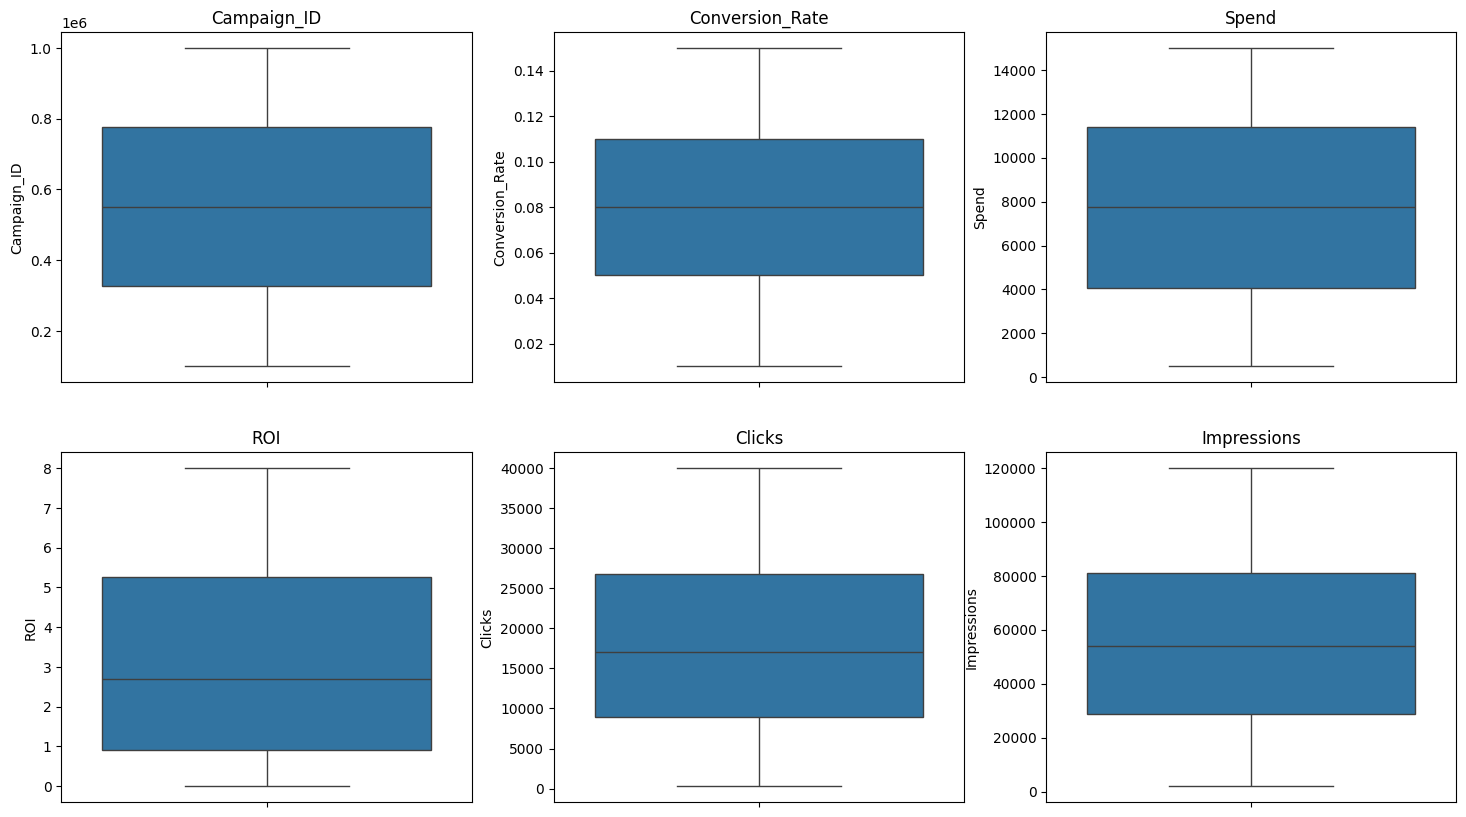

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()
for i, col in enumerate(data._get_numeric_data().columns):
    sns.boxplot(data = data, y = data[col], ax = axs[i])
    axs[i].set_title(col)
plt.show()

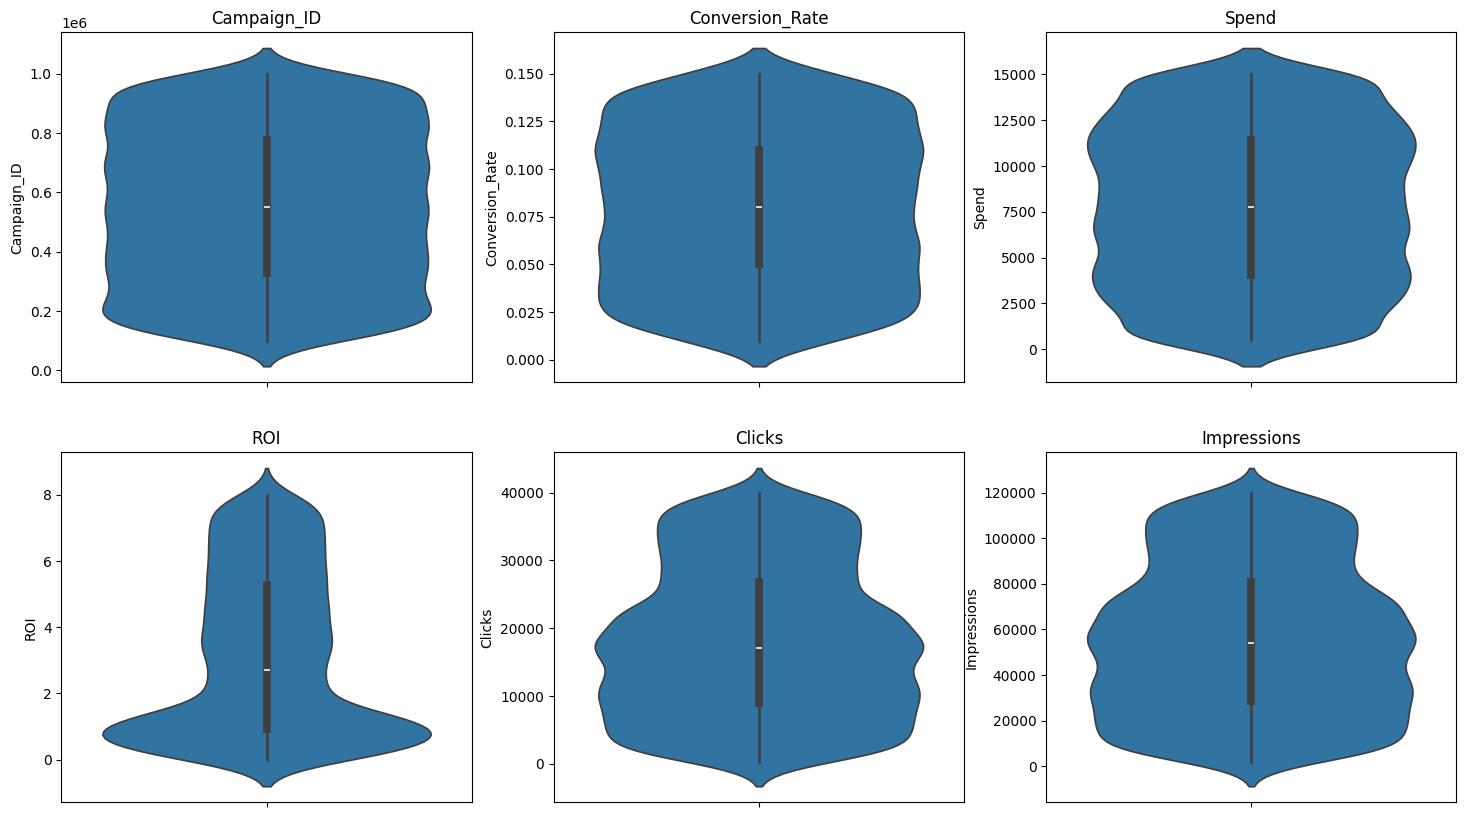

In [15]:
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
axs = axs.flatten()
for i, col in enumerate(data._get_numeric_data().columns):
    sns.violinplot(y = col, data = data, ax=axs[i], orient='h')
    axs[i].set_title(col)
plt.show()

**Nhận xét:**
- Các giá trị ngày tháng phân bố đều trên các khoảng.
- Các giá trị liên quan đến việc bán vé và doanh thu phân bố tập trung ở mức thấp, và có rất nhiều giá trị ngoại lai.
- tickets_out hầu như đều có giá trị 0.
- ticket_price đa số đều có giá trị 80000

#### Đối với các cột kiểu categorical

In [16]:
def col_info(col, array):
    temp = pd.DataFrame(array[col])
    temp = temp.dropna()
    temp = np.array(temp[col])
    data = []
    # num_values
    temp = np.unique(temp, return_counts=True)
    data.append(len(temp[0]))
    # value
    temp = pd.Series(data = temp[1], index = temp[0])
    data.append(temp)
    # num_values
    return data

In [17]:
cat_col_info_df = pd.DataFrame(index = ['num_values', 'value'])
for i in data.select_dtypes(include=['string']):
    cat_col_info_df[i] = col_info(i, data)

cat_col_info_df

,Target_Audience,Campaign_Goal,Duration,Channel_Used,Location,Language,Customer_Segment,Company,Gender,Age_Group
num_values,6,4,4,4,5,3,2,20,2,3
value,Men 18-24 1377 Men 25-34 1377 Men 35-44 1358 Women 18-24 1307 Women 25-34 1328 Women 35-44 1300 dtype: int64,Brand Awareness 1983 Increase Sales 2022 Market Expansion 1953 Product Launch 2089 dtype: int64,15 Days 2042 30 Days 1982 45 Days 1998 60 Days 2025 dtype: int64,Facebook 1968 Instagram 2018 Pinterest 2020 Twitter 2041 dtype: int64,Austin 1593 Las Vegas 1653 Los Angeles 1677 Miami 1552 New York 1572 dtype: int64,English 2699 French 2682 Spanish 2666 dtype: int64,Fashion 4032 Food 4015 dtype: int64,Attire Artistry 389 Bistro Bliss 387 Chic Couture 403 Culinary Quest 393 Dine Divine 403 Epicurean Edge 393 Feast Flavors 419 Fiber Fashion 408 Gastronomy Guild 411 Glam Garments 393 Gourmet Grove 374 Mode Maven 403 Nosh Nirvana 430 Palate Paradise 400 Runway Rebels 386 Savor Street 405 Silk & Style 409 Style Sphere 398 Trend Tailors 416 Vogue Visions 427 dtype: int64,Men 4112 Women 3935 dtype: int64,18-24 2684 25-34 2705 35-44 2658 dtype: int64


Ta vẽ biểu đồ cột để trực quan sự phân bố các giá trị `categorical`.

In [18]:
# Regex pattern để loại bỏ các cột có chứa các từ khóa cần loại bỏ
pattern = re.compile(r'ID|Name|City|State|Country|Category', re.IGNORECASE)

# Lọc các cột kiểu object nhưng không khớp với pattern
object_cols = [col for col in data.select_dtypes(include=['object']).columns if not pattern.search(col)]

# Xác định số hàng và số cột cho grid plot
n_cols = 1  # Số cột cố định
n_rows = -(-len(object_cols) // n_cols)  # Tính số hàng, làm tròn lên

fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))  # Điều chỉnh chiều cao theo số hàng
axs = axs.flatten()  # Chuyển thành danh sách 1D để dễ truy cập

for i, col in enumerate(object_cols):
    sns.countplot(data=data, y=col, ax=axs[i])
    axs[i].set_title(f"Distribution of {col}", fontsize=20, fontweight="bold")  # Tăng size chữ tiêu đề
    axs[i].set_xlabel("")
    axs[i].set_ylabel("")
    axs[i].tick_params(axis='both', labelsize=16)  # Tăng size chữ các giá trị trên trục
    axs[i].grid(True, axis='x', linestyle="--", alpha=0.7)  # Thêm đường lưới dọc

# Ẩn các subplot thừa (nếu có)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.subplots_adjust(hspace=0.5)  # Điều chỉnh khoảng cách giữa các hàng
plt.show()


ValueError: Number of rows must be a positive integer, not 0

<Figure size 2000x0 with 0 Axes>

**Nhận xét:**
- Bộ dữ liệu có tổng cộng 48 phim khác nhau và được tổng hợp dữ liệu bán vè từ 246 rạp chiếu phim.
- Không có tiêu chuẩn nào để nhận xét sự phân bố dữ liệu của 2 trường này.
- Số lượng giá trị của mỗi trường hay tần suất của mỗi giá trị trong trường không tuân theo bất kỳ nguyên tắc nào, hơn nữa, đây đều là những giá trị mã hóa, không mang lại ý nghĩa gì.
- Vậy nên chúng ta không cần quan tâm đến sự phân bố dữ liệu của 2 trường này.

## 3. Khám phá dữ liệu - EDA

## 4. Câu Hỏi Phân Tích Chính

### Thời gian giao hàng trung bình là bao nhiêu, và khu vực nào có thời gian giao hàng chậm nhất?

In [ ]:
# Lọc mỗi đơn hàng chỉ giữ lại 1 dòng
filtered_data = data.drop_duplicates(subset=['Order ID'])
# Chỉ lấy ra những dòng cần thiết
filtered_data = filtered_data[['Order ID', 'City', 'State', 'Returned', 'Region', 'Days']]

In [ ]:
# Thời gian giao hàng trung bình là bao nhiêu?
mean_delivery_day = filtered_data['Days'].mean()
print(f"Thời gian giao hàng trung bình là: {mean_delivery_day:.1f} ngày")

In [ ]:
# Khu vực nào có thời gian giao hàng chậm nhất?
region_delivery = filtered_data.groupby(['Region'])['Days'].agg(['mean'])

# Sắp xếp giảm dần theo thời gian giao hàng trung bình
slowest = region_delivery.sort_values('mean', ascending=False).reset_index()

# Vẽ biểu đồ cho slowest
plt.figure(figsize=(7, 2))
sns.barplot(x=slowest['mean'], y=slowest['Region'], palette="Reds_r")

plt.axvline(mean_delivery_day, color='black', linestyle='dashed', label=f'Avg: {mean_delivery_day:.1f}')
plt.title("Thời gian giao hàng trung bình theo khu vực")
plt.xlabel("Số ngày giao hàng")
plt.ylabel("")
plt.legend()

plt.show()

### 4.2. Thời gian giao hàng ảnh hưởng như thế nào đến lợi nhuận?

### 4.3. Khu vực nào có tỷ lệ hoàn trả cao nhất?

In [ ]:
# Đếm tổng số đơn hàng và số đơn bị hoàn trả theo Region
region_orders = filtered_data.groupby('Region').size()
region_returns = filtered_data[filtered_data['Returned'] == 'Yes'].groupby('Region').size()

# Tính tỷ lệ hoàn trả
return_rate = (region_returns / region_orders).fillna(0).reset_index(name='return_rate')

# Sắp xếp dữ liệu theo tỷ lệ hoàn trả từ cao đến thấp
return_rate = return_rate.sort_values(by='return_rate', ascending=False)

plt.figure(figsize=(8, 4))
sns.scatterplot(x='return_rate', y='Region', data=return_rate, color='red', s=100)
plt.hlines(y=return_rate['Region'], xmin=0, xmax=return_rate['return_rate'], color='red')

plt.title("Tỷ lệ hoàn trả theo khu vực")
plt.xlabel("Tỷ lệ hoàn trả (%)")
plt.xlim(0, return_rate['return_rate'].max() * 1.2)  # Căn chỉnh trục
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0, decimals=0))  # Không hiển thị số thập phân

plt.show()

### 4.4. Sản phẩm nào có tỷ lệ hoàn trả cao nhất, và các nguyên nhân chính là gì?

In [ ]:
def highest_returned_rate(m = 0):
    # Nhóm dữ liệu theo 'Product Name' và tính số lượng đơn hàng cho mỗi sản phẩm
    product_counts = data.groupby('Product Name')['Returned'].count()

    # Lọc các sản phẩm có số lượng đơn hàng > m
    products_above_m = product_counts[product_counts > m]

    # Lấy dữ liệu chi tiết của các sản phẩm này
    temp = data[data['Product Name'].isin(products_above_m.index)]

    # Nhóm lại dữ liệu và tính tỷ lệ hoàn trả và số lượng đơn hàng cho các sản phẩm có số lượng đơn > m
    product_return_rate = temp.groupby(['Product Name', 'Sub-Category', 'Category'])['Returned'].value_counts(normalize=True).unstack(fill_value=0)

    # Tính tỷ lệ hoàn trả cho mỗi sản phẩm
    product_return_rate['return_rate'] = product_return_rate['Yes']

    # Đếm số lượng đơn hàng cho mỗi sản phẩm
    product_return_rate['order_count'] = data.groupby(['Product Name', 'Sub-Category', 'Category'])['Returned'].count()

    # Tính trung bình của cột 'Quantity' cho mỗi sản phẩm
    product_return_rate['Avg_Quantity'] = data.groupby(['Product Name', 'Sub-Category', 'Category'])['Quantity'].mean()

    # Đưa thông tin vào DataFrame mới để dễ đọc và sử dụng
    product_return_rate_df = product_return_rate.reset_index()

    # Chọn cột cần hiển thị
    product_return_rate_df = product_return_rate_df[['Product Name', 'Sub-Category', 'Category', 'return_rate', 'order_count', 'Avg_Quantity']]
    
    # Đổi tỷ lệ hoàn trả thành phần trăm
    product_return_rate_df['return_rate'] = product_return_rate_df['return_rate'] * 100

    # Sắp xếp theo tỷ lệ hoàn trả từ cao đến thấp
    product_return_rate_df_sorted = product_return_rate_df.sort_values(by='return_rate', ascending=False)

    # Đổi cột index thành Rank
    product_return_rate_df_sorted.reset_index(drop=True, inplace=True)
    
    # Nếu m = 0, lấy tất cả các sản phẩm có tỷ lệ hoàn trả cao nhất
    if m == 0:
        max_return_rate = product_return_rate_df_sorted['return_rate'].max()  # Lấy tỷ lệ hoàn trả cao nhất
        product_return_rate_df_sorted = product_return_rate_df_sorted[product_return_rate_df_sorted['return_rate'] == max_return_rate]  # Lọc tất cả các sản phẩm có tỷ lệ hoàn trả cao nhất
        return product_return_rate_df_sorted.head(10)
    else:
        return product_return_rate_df_sorted.head(5)
    
    # Hiển thị kết quả đã sắp xếp
    

In [ ]:
highest_returned_rate()

In [ ]:
highest_returned_rate(10)

### 4.5. Xu hướng doanh thu và lợi nhuận theo thời gian (hàng năm, hàng quý, hàng tháng) như thế nào?

In [ ]:
# Lọc dữ liệu chỉ giữ những dòng có 'Returned' là 'Not'
filtered_data = data[data['Returned'] == 'Not']

In [ ]:
# Lấy ngày nhỏ nhất và ngày lớn nhất từ cột 'Ship Date'
min_date = data['Order Date'].min()
max_date = data['Order Date'].max()

print(f"Dữ liệu được lấy từ ngày {min_date.strftime('%d-%m-%Y')} tới ngày {max_date.strftime('%d-%m-%Y')}")


In [ ]:
# Dictionary ánh xạ period với tên phân kỳ và định dạng thời gian
period_dict = {
    'M': {'name': 'tháng', 'freq': 'M', 'format': '%Y-%m'},
    'Q': {'name': 'quý', 'freq': 'Q', 'format': '%Y-Q%q'},
    'Y': {'name': 'năm', 'freq': 'Y', 'format': '%Y'}
}

def Revenue_by_Period(data, period='M'):

    # Kiểm tra xem period có hợp lệ không
    if period not in period_dict:
        raise ValueError("Invalid period. Choose from 'M', 'Q', or 'Y'.")
    
    # Lấy thông tin từ dictionary
    period_info = period_dict[period]
    period_name = period_info['name']
    period_format = period_info['format']
    
    # Tính doanh thu theo period
    period_revenue = data.groupby(data['Order Date'].dt.to_period(period_info['freq']))['Sales'].sum().reset_index()
    period_revenue['Period'] = period_revenue['Order Date'].dt.strftime(period_format)

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Period', y='Sales', data=period_revenue, marker='o', color='blue')
    
    # Cài đặt tiêu đề và nhãn
    plt.title(f'Doanh thu theo {period_name}', fontsize=16)
    plt.xlabel(f'{period_name}', fontsize=12)
    plt.ylabel('Doanh thu', fontsize=12)
    
    # Chỉnh sửa trục x để chỉ hiển thị 3 tháng một lần (chỉ đối với 'M')
    if period == 'M':
        ticks = period_revenue['Period'][::3]
        plt.xticks(ticks, rotation=45)
    else:
        plt.xticks(rotation=45)
    
    plt.tight_layout()
    
    # Hiển thị biểu đồ
    plt.show()

    # Trả về dữ liệu doanh thu theo period
    return period_revenue

# Sử dụng hàm:
# Doanh thu theo tháng
revenue_month = Revenue_by_Period(filtered_data, 'M')

# Doanh thu theo quý
revenue_quarter = Revenue_by_Period(filtered_data, 'Q')

# Doanh thu theo năm
revenue_year = Revenue_by_Period(filtered_data, 'Y')

In [ ]:
def avg_by_month():
    # Thêm một cột 'Month' chỉ chứa tháng (không bao gồm năm)
    filtered_data['Month'] = filtered_data['Order Date'].dt.strftime('%m')  # Chỉ lấy tháng

    # Tính tổng doanh thu theo tháng
    month_revenue = filtered_data.groupby('Month')['Sales'].sum().reset_index()

    # Vẽ biểu đồ
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Month', y='Sales', data=month_revenue, marker='o', color='blue')

    # Cài đặt tiêu đề và nhãn
    plt.title('Doanh thu bình quân theo Tháng', fontsize=16)
    plt.xlabel('Tháng', fontsize=12)
    plt.ylabel('Doanh thu (VNĐ)', fontsize=12)

    # Đảm bảo trục X chỉ hiển thị tháng 1-12
    plt.xticks(ticks=[str(i).zfill(2) for i in range(1, 13)], labels=['Tháng ' + str(i) for i in range(1, 13)], rotation=45)

    plt.tight_layout()

    # Hiển thị biểu đồ
    plt.show()
    
avg_by_month()

### 4.6. 5 khu vực nào có doanh thu cao nhất và thấp nhất?

Do `Region` chỉ có 4 khu vực nên đoạn này sẽ dùng `State` để phân tích.

In [ ]:
# Nhóm dữ liệu theo 'State' và tính tổng Sales
state_sales = filtered_data.groupby('State')['Sales'].sum().reset_index()

# Sắp xếp theo doanh thu giảm dần
state_sales_sorted = state_sales.sort_values(by='Sales', ascending=False)

# Lấy top 5 cao nhất và thấp nhất
top_highest = state_sales_sorted.head(5)
top_lowest = state_sales_sorted.tail(5)

# Tạo figure với 2 biểu đồ ngang
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Vẽ biểu đồ top 5 cao nhất
sns.barplot(y=top_highest['State'], x=top_highest['Sales'] / 1000, palette="Blues_r", ax=axs[0])
axs[0].set_title("Top 5 Bang có Doanh Thu Cao Nhất")
axs[0].set_xlabel("Doanh thu (K)")
axs[0].set_ylabel("Bang (State)")
axs[0].set_xlim(0, top_highest['Sales'].max() / 1000 * 1.1)  # Giới hạn trục x riêng

# Vẽ biểu đồ top 5 thấp nhất
sns.barplot(y=top_lowest['State'], x=top_lowest['Sales'], palette="Reds_r", ax=axs[1])
axs[1].set_title("Top 5 Bang có Doanh Thu Thấp Nhất")
axs[1].set_xlabel("Doanh thu")
axs[1].set_ylabel("")
# axs[1].set_xlim(0, top_lowest['Sales'].max() * 1.1)  # Giới hạn trục x riêng

# Căn chỉnh layout
plt.tight_layout()
plt.show()

### 4.7. Những sản phẩm nào có doanh số cao nhất và thấp nhất?

In [ ]:
# Nhóm dữ liệu theo 'Product Name' và tính tổng Sales
product_sales = filtered_data.groupby('Product Name')['Sales'].sum().reset_index()

# Sắp xếp theo doanh thu giảm dần và lấy top 5 cao nhất & thấp nhất
top_highest_products = product_sales.nlargest(5, 'Sales')
top_lowest_products = product_sales.nsmallest(5, 'Sales')

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# Thêm cột rút gọn tên sản phẩm
top_highest_products['Short Name'] = top_highest_products['Product Name'].str[:15] + '...'
top_lowest_products['Short Name'] = top_lowest_products['Product Name'].str[:15] + '...'

# Top 5 sản phẩm có doanh thu cao nhất
sns.barplot(y=top_highest_products.sort_values(by='Sales', ascending=False)['Short Name'], 
            x=top_highest_products['Sales'] / 1000, palette="Blues_r", ax=axs[0])
axs[0].set_title("Top 5 Sản Phẩm Có Doanh Số Cao Nhất")
axs[0].set_xlabel("Doanh thu (K)")
axs[0].set_ylabel("")

# Top 5 sản phẩm có doanh thu thấp nhất
sns.barplot(y=top_lowest_products.sort_values(by='Sales', ascending=False)['Short Name'], 
            x=top_lowest_products['Sales'], palette="Reds_r", ax=axs[1])
axs[1].set_title("Top 5 Sản Phẩm Có Doanh Số Thấp Nhất")
axs[1].set_xlabel("Doanh thu")
axs[1].set_ylabel("")

plt.tight_layout()
plt.show()


### 4.8. Phân khúc khách hàng nào đóng góp nhiều nhất vào tổng doanh thu?

In [ ]:
# Nhóm dữ liệu theo phân khúc khách hàng và tính tổng doanh thu
segment_sales = filtered_data.groupby('Segment')['Sales'].sum().reset_index()

# Sắp xếp theo doanh thu giảm dần để tìm phân khúc đóng góp nhiều nhất
segment_sales = segment_sales.sort_values(by='Sales', ascending=False)

In [ ]:
plt.figure(figsize=(8, 3))
sns.barplot(x=segment_sales['Sales'] / 1000, y=segment_sales['Segment'], palette="Blues_r")

plt.title("Doanh thu theo phân khúc khách hàng")
plt.xlabel("Tổng doanh thu (K)")
plt.ylabel("Phân khúc khách hàng")

plt.show()

### 4.9. Tính mùa vụ ảnh hưởng đến doanh số như thế nào? Xác định các giai đoạn cao điểm và thấp điểm. 

In [ ]:
avg_by_month()

### 4.10. Dự báo doanh thu của quý tiếp theo dựa trên dữ liệu hiện tại.